In [111]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
# All the column attrivbutes are read through and clearly understood. ID and ZIP Code columns does not seems to be nescessary

In [8]:
print(f'Shape of the data is {data.shape}')

Shape of the data is (5000, 14)


In [12]:
pd.DataFrame(data['Personal Loan'].value_counts()).T
# out of 5000 customers only 480 have accepted the personal loan

0    1
Personal Loan  4520  480

In [13]:
data.dtypes
# all the entries of all the columns are of integer types only

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [14]:
train = data.copy()
train = train.drop(['ID','ZIP Code'],axis=1)
# removing unwanted columns

In [15]:
train.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [27]:
name=['Null/Nan']
pd.DataFrame((train.isnull().sum()),columns= name).T
# there are no null entries

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
Null/Nan    0           0       0       0      0          0         0   

          Personal Loan  Securities Account  CD Account  Online  CreditCard  
Null/Nan              0                   0           0       0           0

In [28]:
train.describe().T
# Experience minimum value is -3 which implies there are some negative values and it needs to be taken care of

count       mean         std   min   25%   50%    75%  \
Age                 5000.0  45.338400   11.463166  23.0  35.0  45.0   55.0   
Experience          5000.0  20.104600   11.467954  -3.0  10.0  20.0   30.0   
Income              5000.0  73.774200   46.033729   8.0  39.0  64.0   98.0   
Family              5000.0   2.396400    1.147663   1.0   1.0   2.0    3.0   
CCAvg               5000.0   1.937938    1.747659   0.0   0.7   1.5    2.5   
Education           5000.0   1.881000    0.839869   1.0   1.0   2.0    3.0   
Mortgage            5000.0  56.498800  101.713802   0.0   0.0   0.0  101.0   
Personal Loan       5000.0   0.096000    0.294621   0.0   0.0   0.0    0.0   
Securities Account  5000.0   0.104400    0.305809   0.0   0.0   0.0    0.0   
CD Account          5000.0   0.060400    0.238250   0.0   0.0   0.0    0.0   
Online              5000.0   0.596800    0.490589   0.0   0.0   1.0    1.0   
CreditCard          5000.0   0.294000    0.455637   0.0   0.0   0.0    1.0   

                      max  
Age                  67.0  
Experience           43.0  
Income              224.0  
Family                4.0  
CCAvg                10.0  
Education             3.0  
Mortgage            635.0  
Personal Loan         1.0  
Securities Account    1.0  
CD Account            1.0  
Online                1.0  
CreditCard            1.0

In [29]:
train.corr()
# the target variable 'Personal Loan seems to have a good correlation with Income,CCAvg, CD amount

Age  Experience    Income    Family     CCAvg  \
Age                 1.000000    0.994215 -0.055269 -0.046418 -0.052012   
Experience          0.994215    1.000000 -0.046574 -0.052563 -0.050077   
Income             -0.055269   -0.046574  1.000000 -0.157501  0.645984   
Family             -0.046418   -0.052563 -0.157501  1.000000 -0.109275   
CCAvg              -0.052012   -0.050077  0.645984 -0.109275  1.000000   
Education           0.041334    0.013152 -0.187524  0.064929 -0.136124   
Mortgage           -0.012539   -0.010582  0.206806 -0.020445  0.109905   
Personal Loan      -0.007726   -0.007413  0.502462  0.061367  0.366889   
Securities Account -0.000436   -0.001232 -0.002616  0.019994  0.015086   
CD Account          0.008043    0.010353  0.169738  0.014110  0.136534   
Online              0.013702    0.013898  0.014206  0.010354 -0.003611   
CreditCard          0.007681    0.008967 -0.002385  0.011588 -0.006689   

                    Education  Mortgage  Personal Loan  Securities Account  \
Age                  0.041334 -0.012539      -0.007726           -0.000436   
Experience           0.013152 -0.010582      -0.007413           -0.001232   
Income              -0.187524  0.206806       0.502462           -0.002616   
Family               0.064929 -0.020445       0.061367            0.019994   
CCAvg               -0.136124  0.109905       0.366889            0.015086   
Education            1.000000 -0.033327       0.136722           -0.010812   
Mortgage            -0.033327  1.000000       0.142095           -0.005411   
Personal Loan        0.136722  0.142095       1.000000            0.021954   
Securities Account  -0.010812 -0.005411       0.021954            1.000000   
CD Account           0.013934  0.089311       0.316355            0.317034   
Online              -0.015004 -0.005995       0.006278            0.012627   
CreditCard          -0.011014 -0.007231       0.002802           -0.015028   

                    CD Account    Online  CreditCard  
Age                   0.008043  0.013702    0.007681  
Experience            0.010353  0.013898    0.008967  
Income                0.169738  0.014206   -0.002385  
Family                0.014110  0.010354    0.011588  
CCAvg                 0.136534 -0.003611   -0.006689  
Education             0.013934 -0.015004   -0.011014  
Mortgage              0.089311 -0.005995   -0.007231  
Personal Loan         0.316355  0.006278    0.002802  
Securities Account    0.317034  0.012627   -0.015028  
CD Account            1.000000  0.175880    0.278644  
Online                0.175880  1.000000    0.004210  
CreditCard            0.278644  0.004210    1.000000

In [30]:
len(train[train['Experience']<0])
# there are 52 entries which have values of experience less than 0

52

In [31]:
# there are certain values in experience columns which are negative. 
# since experience cannot be negative. This should be a mistake entry. hence we need to convert them
train.Experience = train.Experience.replace({-1:1,-2:2,-3:3})
train[train['Experience']<0]

Empty DataFrame
Columns: [Age, Experience, Income, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

In [32]:
train.describe().T

count       mean         std   min   25%   50%    75%  \
Age                 5000.0  45.338400   11.463166  23.0  35.0  45.0   55.0   
Experience          5000.0  20.134600   11.415189   0.0  10.0  20.0   30.0   
Income              5000.0  73.774200   46.033729   8.0  39.0  64.0   98.0   
Family              5000.0   2.396400    1.147663   1.0   1.0   2.0    3.0   
CCAvg               5000.0   1.937938    1.747659   0.0   0.7   1.5    2.5   
Education           5000.0   1.881000    0.839869   1.0   1.0   2.0    3.0   
Mortgage            5000.0  56.498800  101.713802   0.0   0.0   0.0  101.0   
Personal Loan       5000.0   0.096000    0.294621   0.0   0.0   0.0    0.0   
Securities Account  5000.0   0.104400    0.305809   0.0   0.0   0.0    0.0   
CD Account          5000.0   0.060400    0.238250   0.0   0.0   0.0    0.0   
Online              5000.0   0.596800    0.490589   0.0   0.0   1.0    1.0   
CreditCard          5000.0   0.294000    0.455637   0.0   0.0   0.0    1.0   

                      max  
Age                  67.0  
Experience           43.0  
Income              224.0  
Family                4.0  
CCAvg                10.0  
Education             3.0  
Mortgage            635.0  
Personal Loan         1.0  
Securities Account    1.0  
CD Account            1.0  
Online                1.0  
CreditCard            1.0

In [33]:
m=['Skewness']
pd.DataFrame((train.iloc[:,2:7].skew()),columns= m).T
# This skewness measure table shows us that 'CCAvg' and 'Mortgage' are positively skewed

Income    Family     CCAvg  Education  Mortgage
Skewness  0.841339  0.155221  1.598443   0.227093  2.104002

In [34]:
                                                   #Perform EDA

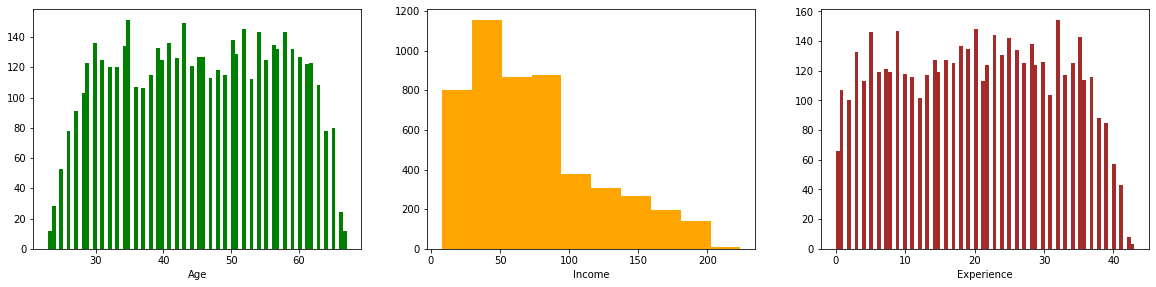

In [35]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
plt.hist(train['Age'],color='green',bins=80)
plt.xlabel('Age')

plt.subplot(3,3,2)
plt.hist(train['Income'],color='orange')
plt.xlabel('Income')

plt.subplot(3,3,3)
plt.hist(train['Experience'],color='brown',bins=80)
plt.xlabel('Experience')


plt.show()

# from the below histogram we can incur that the age distribution is normally distributed
# and most of the age group are around 35-55

# The income data is skewed to the right
# the experience is also normally distributed

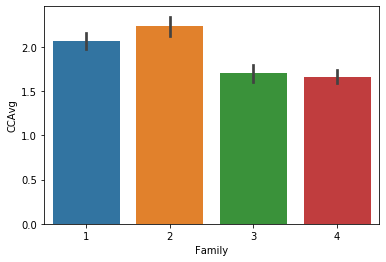

In [36]:
sns.barplot(x='Family',y='CCAvg',data=train)
# The average spending on credit card every month seems to be comparitively lesser when the family members is 3 or more

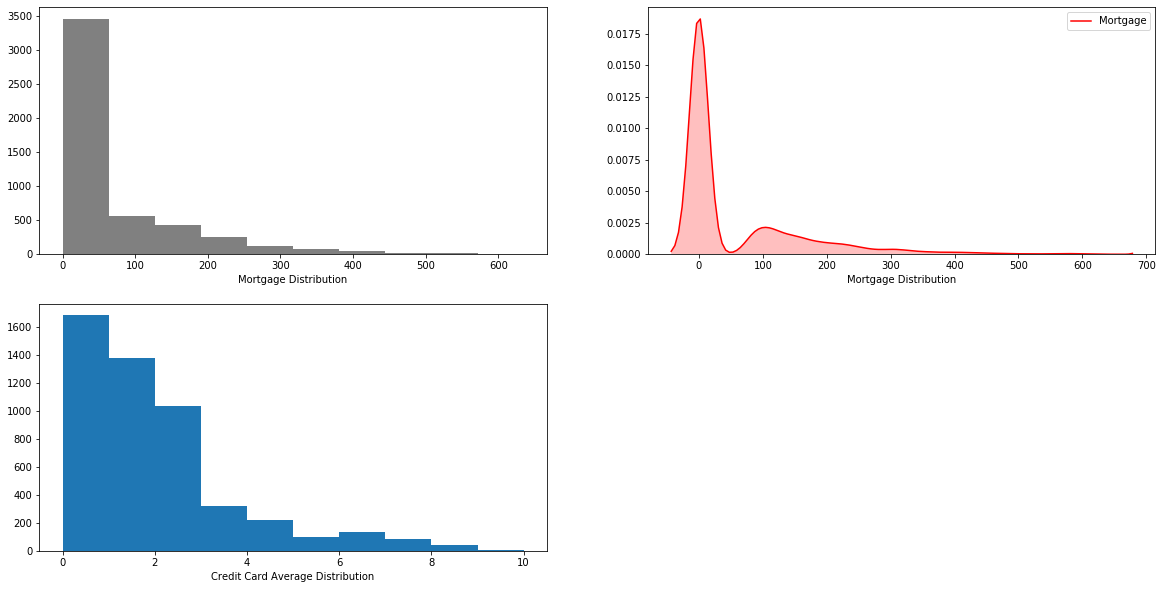

In [120]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(train['Mortgage'],color='grey')
plt.xlabel('Mortgage Distribution')

plt.subplot(2,2,2)
sns.kdeplot(train['Mortgage'],shade=True,color='red')
plt.xlabel('Mortgage Distribution')

plt.subplot(2,2,3)
plt.hist(train['CCAvg'])
plt.xlabel('Credit Card Average Distribution')

plt.show()

# Clearly, a high majority of the customers have mortgage less than 100 K

#  CCAvg is Positively skewed. Majority of customers have CCAvg below 3 K

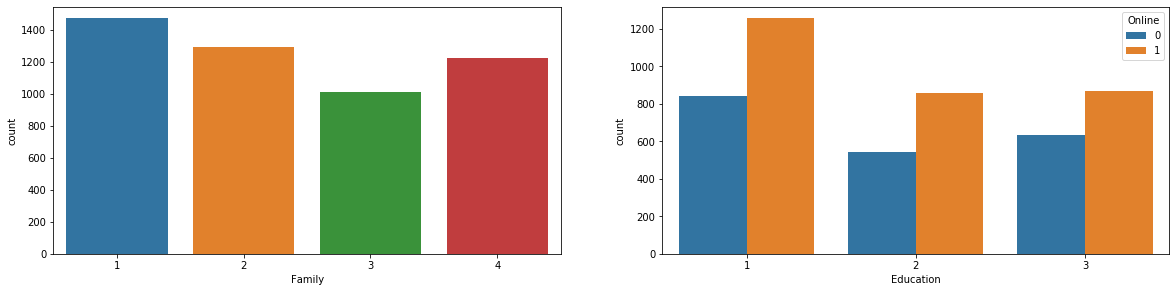

In [122]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.countplot(x='Family',data=train)

plt.subplot(2,2,2)
sns.countplot(x='Education',data=train,hue='Online')

plt.show()

# customers with 1 and 2 family members are comparatively higher than customers with 3&4 family members

# most customers across all types of degree holders tend to have access to online banking facility

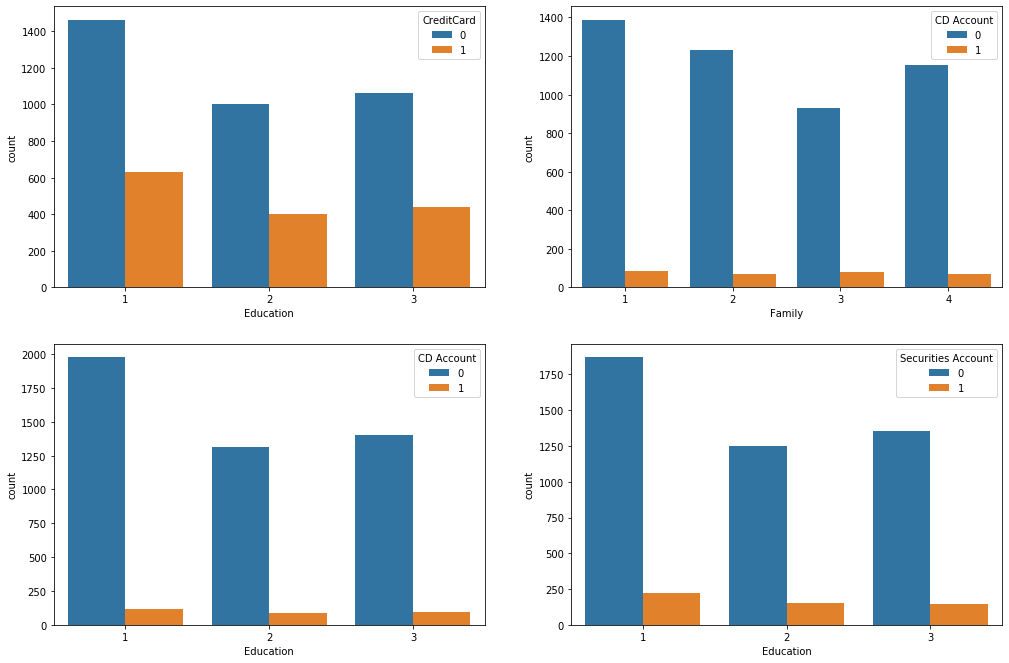

In [145]:

plt.figure(figsize=(17,30))

plt.subplot(5,2,1)
sns.countplot(x='Education',data=train,hue='CreditCard')

plt.subplot(5,2,2)
sns.countplot(x='Family',data=train,hue='CD Account')

plt.subplot(5,2,3)
sns.countplot(x='Education',data=train,hue='CD Account')

plt.subplot(5,2,4)
sns.countplot(x='Education',data=train,hue='Securities Account')

plt.show()

# It can be inferred that customers with single degree tend have credit card more than customers with 2 or more degrees

# Family and Education does not have any influence on CD Account

# Education does not have any high influence on whether or not a person has Securities account.
# However customer with 1 degree have slighlty higher securities account count than the others

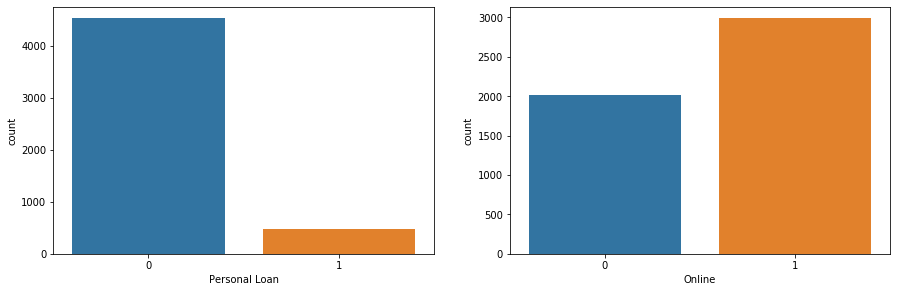

In [38]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(x='Personal Loan',data=train)

plt.subplot(2,2,2)
sns.countplot(x='Online',data=train)

plt.show()

# Customers who accepted personal loan are very less compared with customers who did not accept

# Majority of the customers have Internet banking facilities

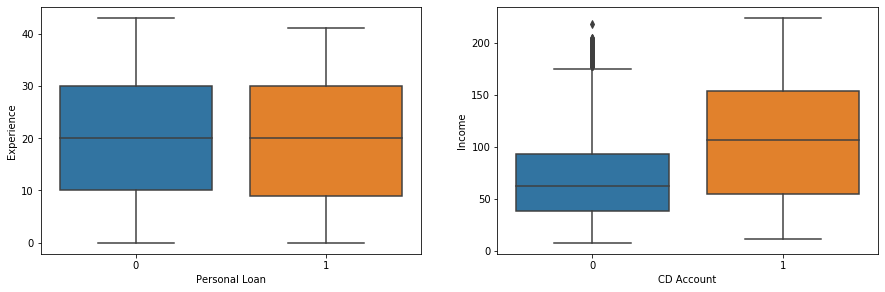

In [39]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x='Personal Loan',y='Experience',data=train)

plt.subplot(2,2,2)
sns.boxplot(x='CD Account',y='Income',data=train)

# Experience does not have any major influence on accepting the loan
# Customers with income more than 75K are more likely to have a CD Account

plt.show()

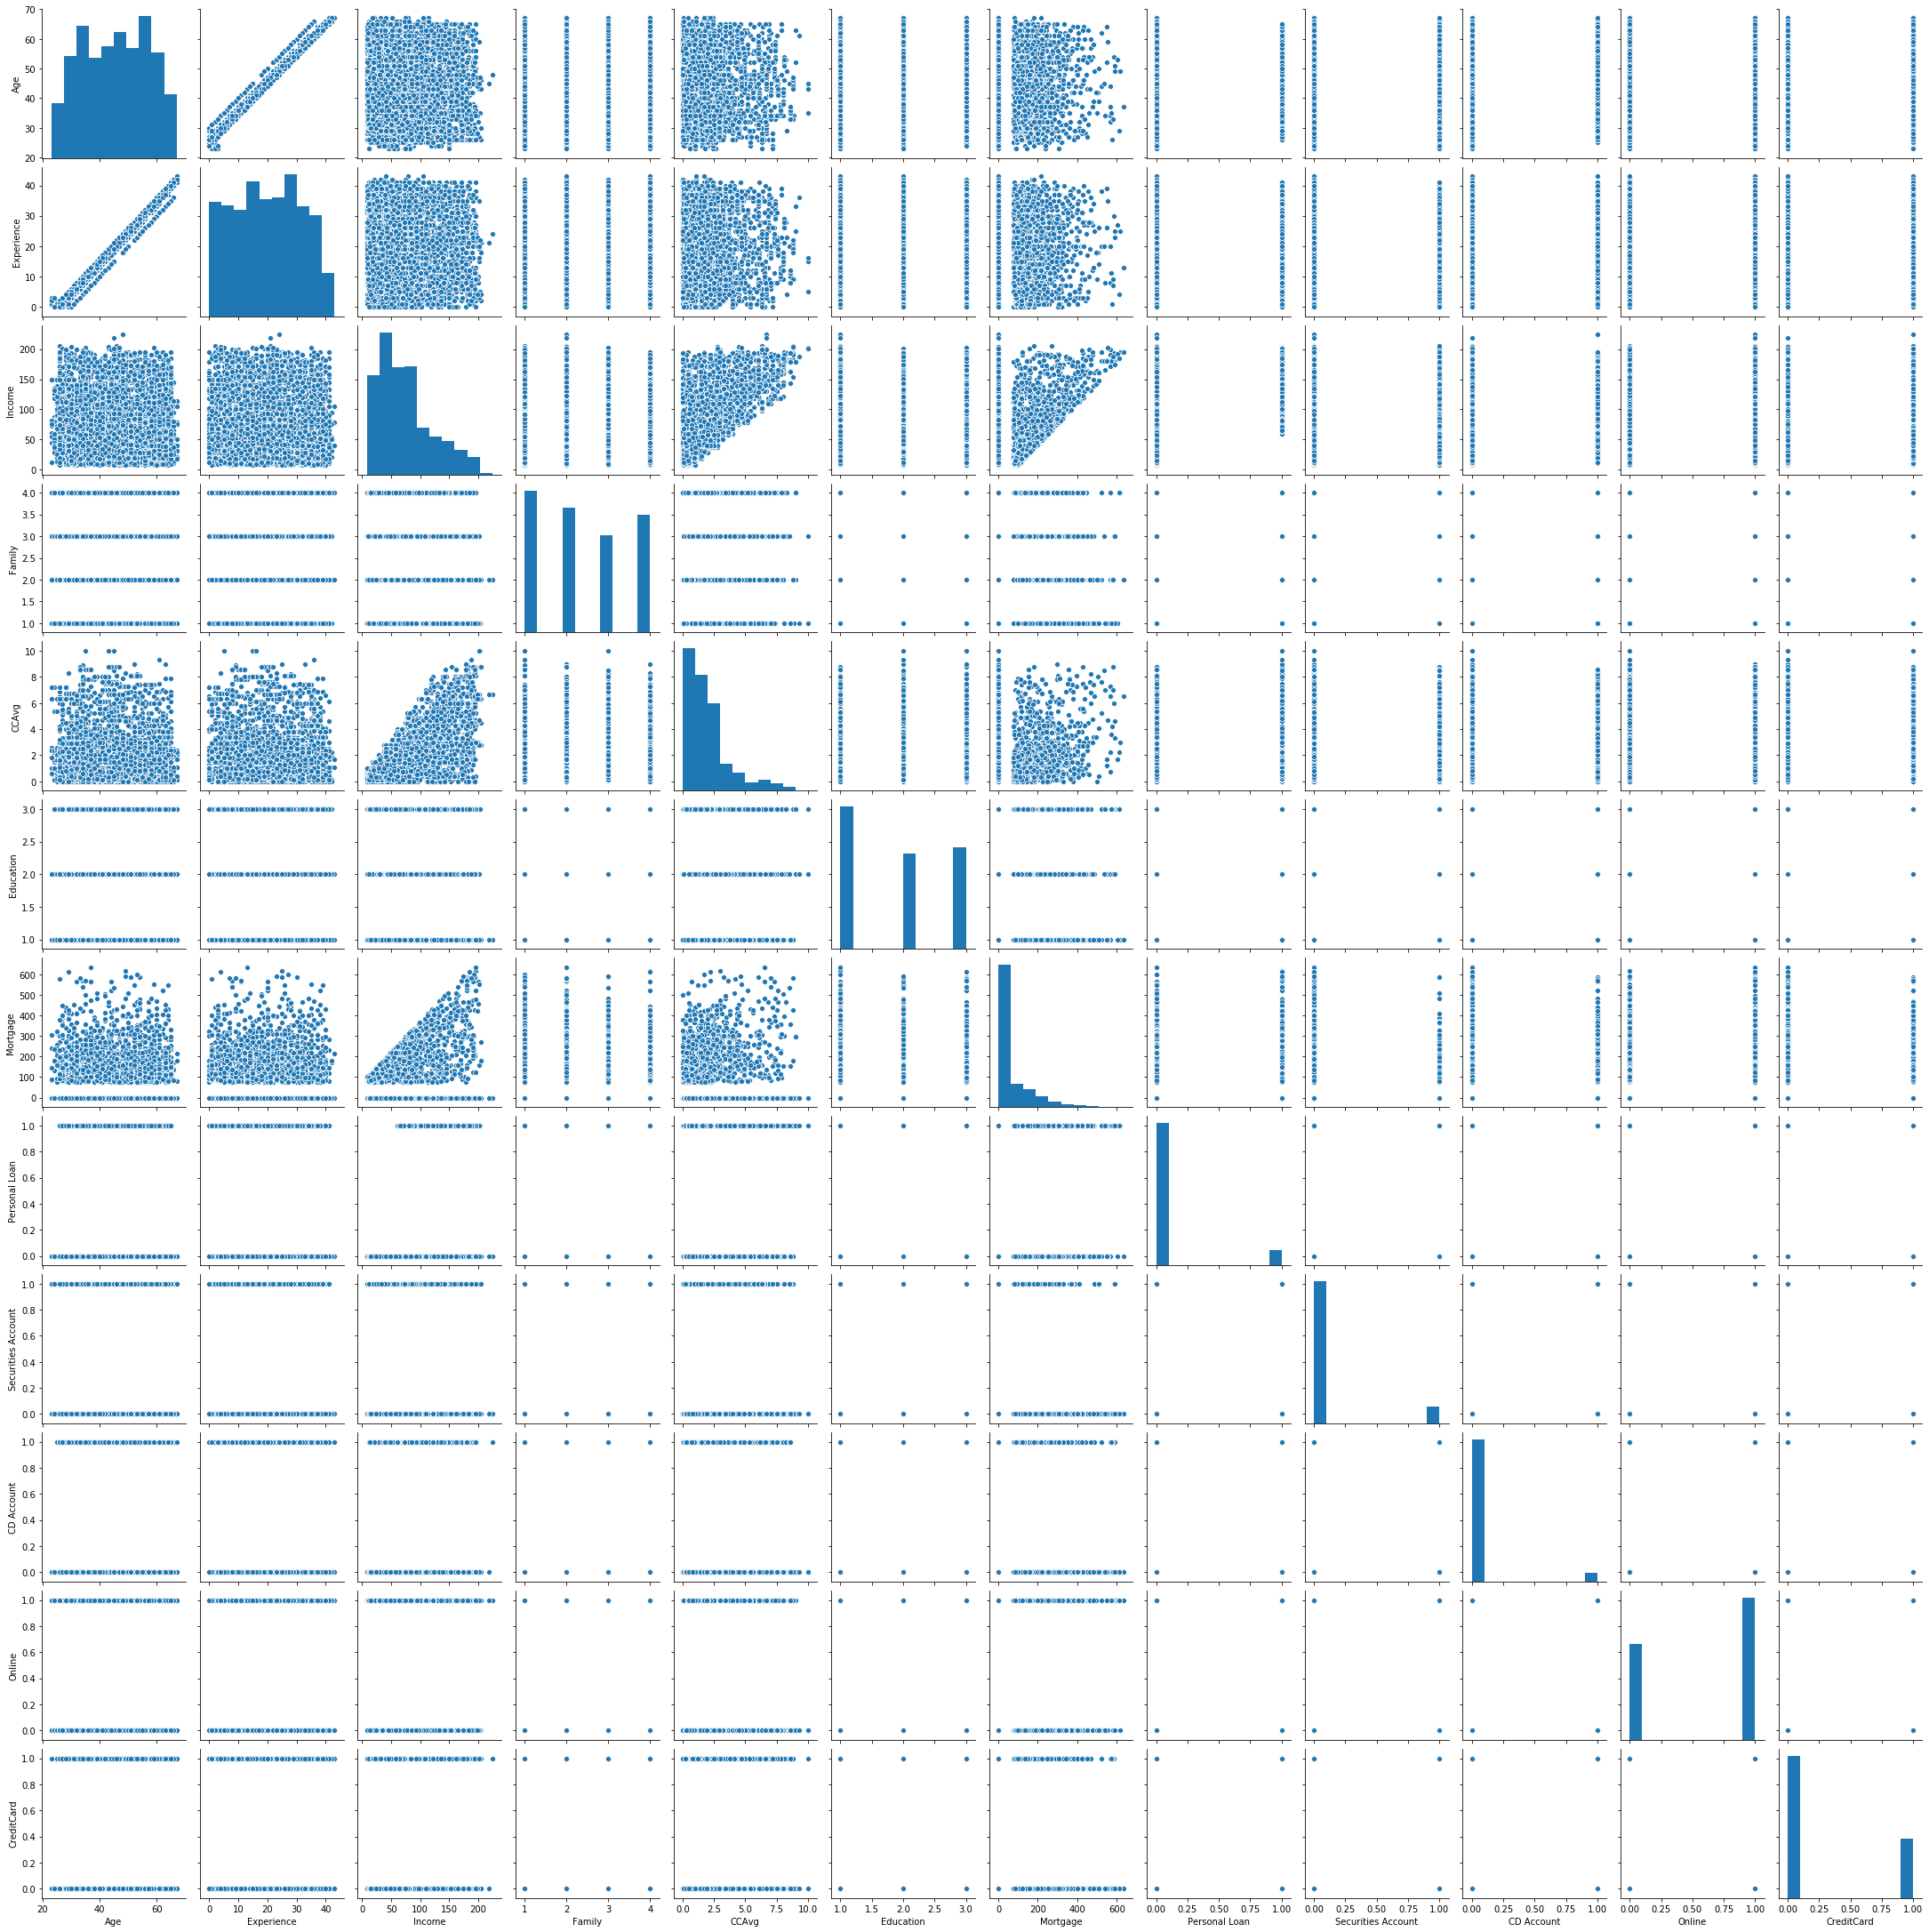

In [43]:
sns.pairplot(train)

# the pairplot below serves as another evidence of my statement that, Age, Experience and normally distributed
# Income, CCAvg, Mortage are right skewed
# there is a strong linear relation between age and experience

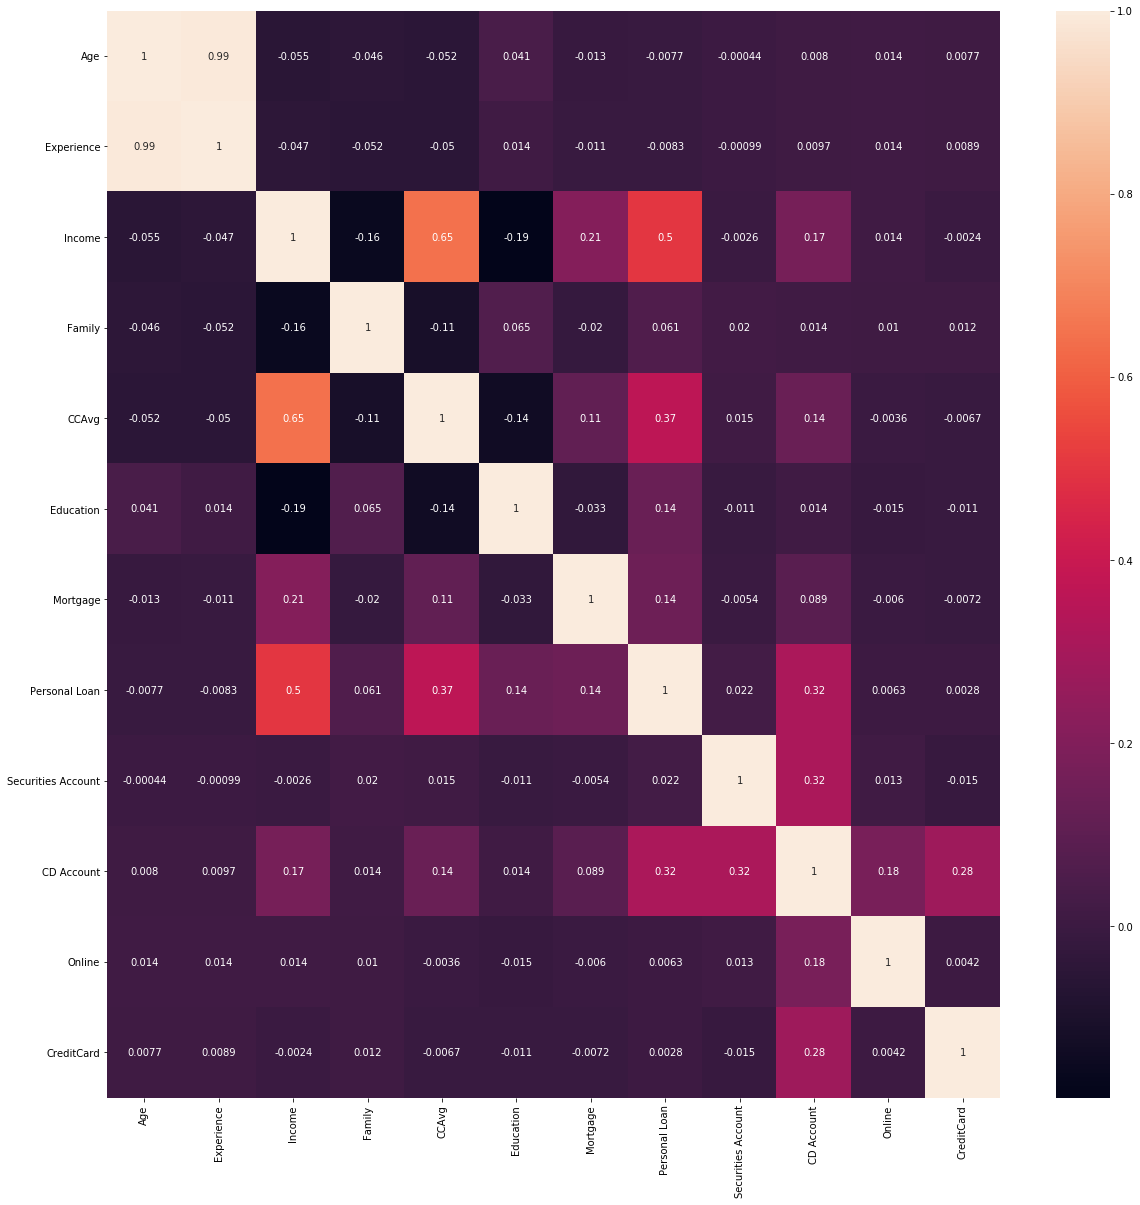

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True)
plt.show()

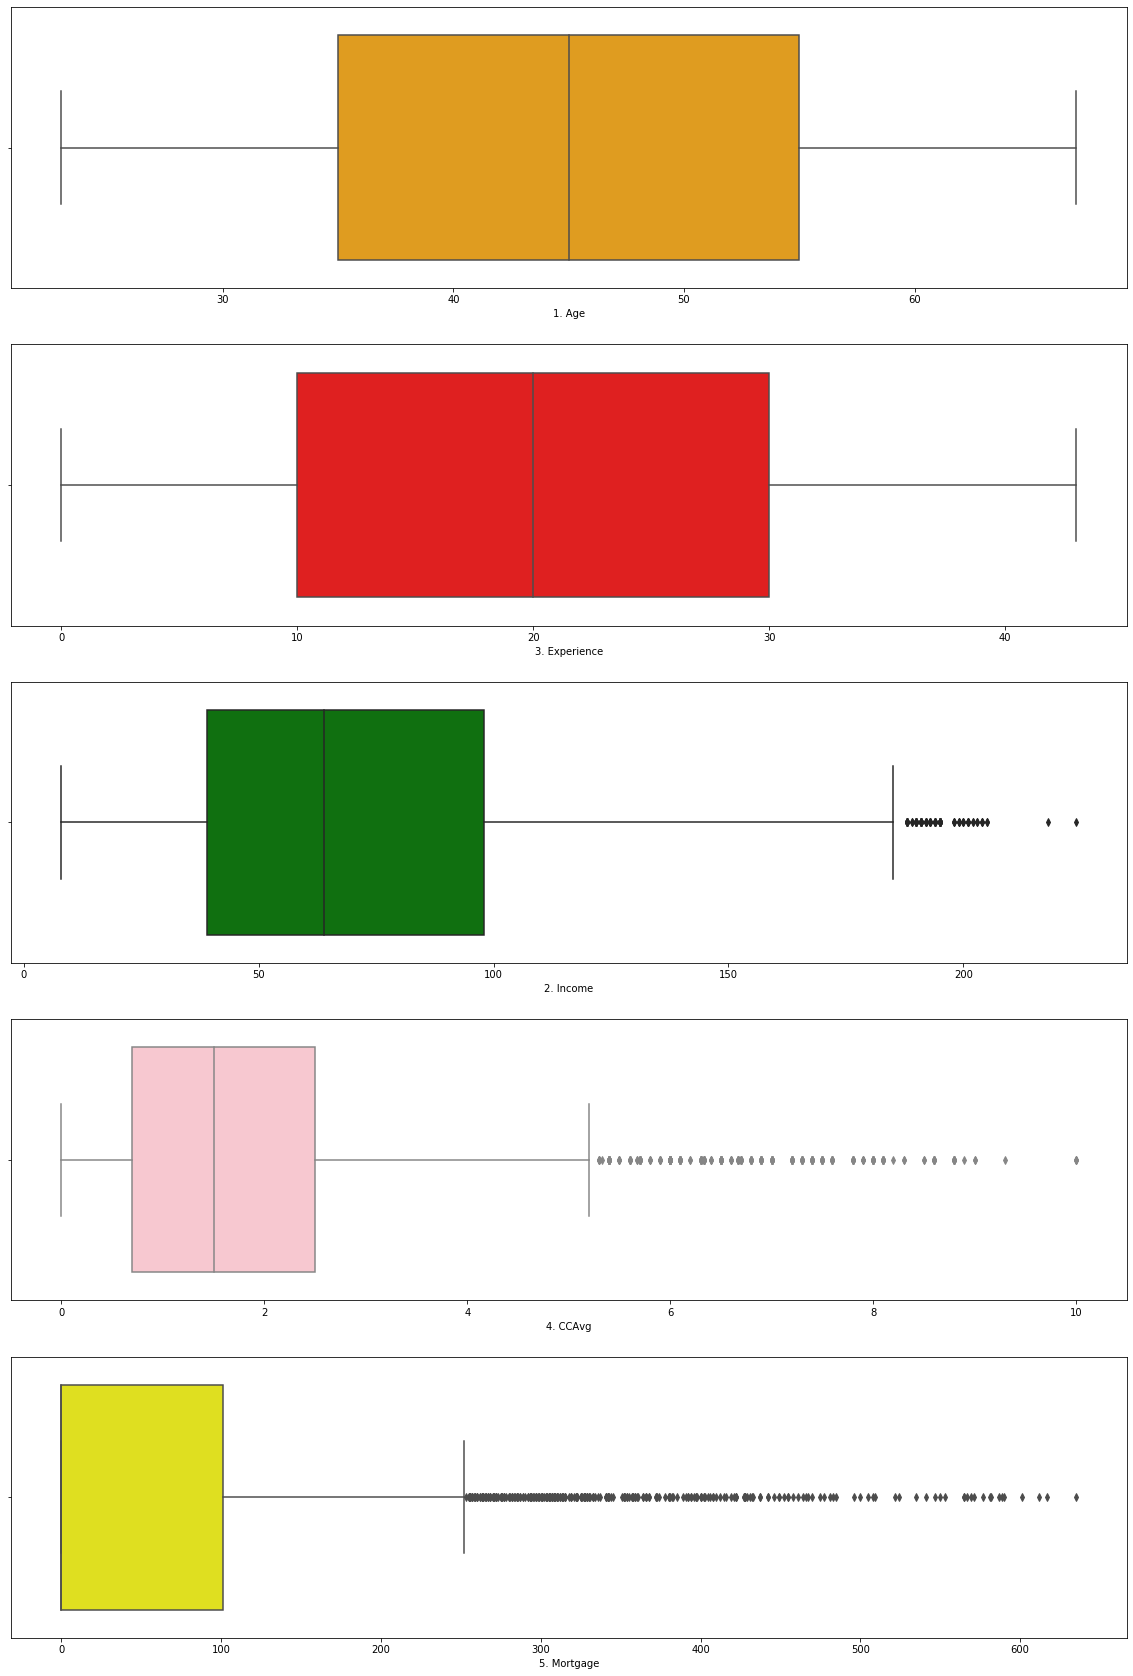

In [48]:

plt.figure(figsize=(20,30))

plt.subplot(5,1,1)
sns.boxplot(train['Age'],color='orange')
plt.xlabel('1. Age')

plt.subplot(5,1,3)
sns.boxplot(train['Income'],color='green')
plt.xlabel('2. Income')

plt.subplot(5,1,2)
sns.boxplot(train['Experience'],color='red')
plt.xlabel('3. Experience')

plt.subplot(5,1,4)
sns.boxplot(train['CCAvg'],color='pink')
plt.xlabel('4. CCAvg')

plt.subplot(5,1,5)
sns.boxplot(train['Mortgage'],color='yellow')
plt.xlabel('5. Mortgage')

plt.show()

# 1 & 2 Age and Experience seem to have no outliers.
# 3 & 4 Income and CCAvg have outliers
# 5 Mortgage seems to have plenty of outliers

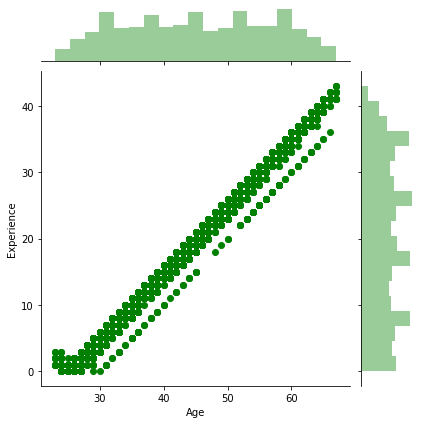

In [47]:
sns.jointplot(x='Age',y='Experience',data=train,color='green')
# clearly, age and experience have a linear correlation

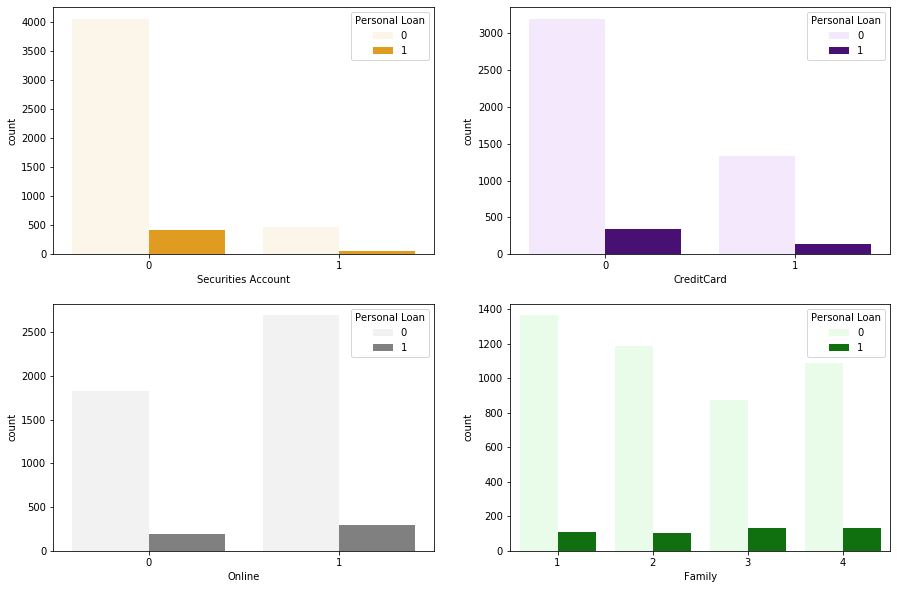

In [62]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(x='Securities Account',data=train,hue='Personal Loan',color='orange')

plt.subplot(2,2,2)
sns.countplot(x='CreditCard',data=train,hue='Personal Loan',color='Indigo')

plt.subplot(2,2,3)
sns.countplot(x='Online',data=train,hue='Personal Loan',color='Grey',saturation=18.75)

plt.subplot(2,2,4)
sns.countplot(x='Family',data=train,hue='Personal Loan',color='Green')

plt.show()

# 1. Most of the customers are without security account
# customers who do not have securities account have accepted more personal loan than customers who have securities account

# 2. customers who dont have credit card accepted the personal loan more than cutomers who use credit card

# 3. customers with internet banking access accepted personal loan slightly higher than customer who dont have internet banking 

# 4. family size does not have a high impact on whether or not a person takes personal loan. 
# However, comparitively, customers with 3 and 4 family members tend to accept, 
# the personal loan higher than customers with less than two family members

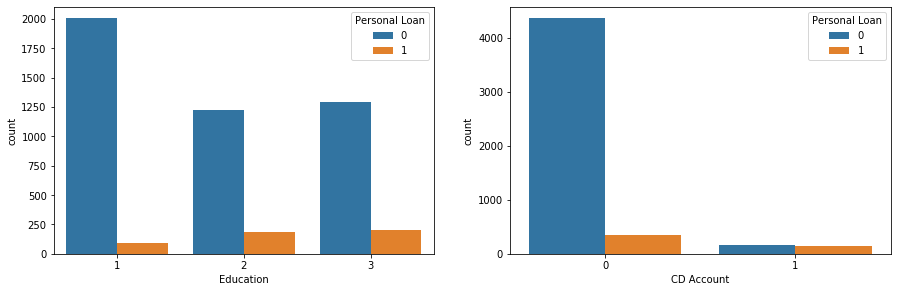

In [64]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(x='Education',data=train,hue='Personal Loan')

plt.subplot(2,2,2)
sns.countplot(x='CD Account',hue='Personal Loan',data=train)

plt.show()

# customers with two or more degrees tend to accept the personal loan higher than customers with single degree

# Customers without CD Account have accepted personal loan more than customers with CD Account.
# but the 'rate of accepting' perosnal loan is higher when they have a CD Account

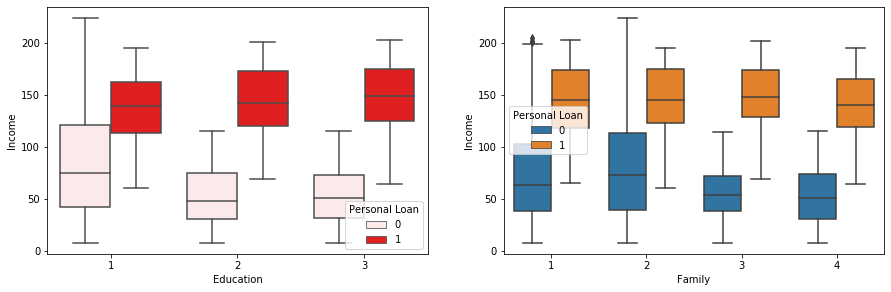

In [70]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=train,color='red')

plt.subplot(2,2,2)
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=train)

plt.show()

# customers across all education level who have income less than 120 K are less likely to accept a personal loan

# Families with income more than 100 K are more likely to accept a personal loan

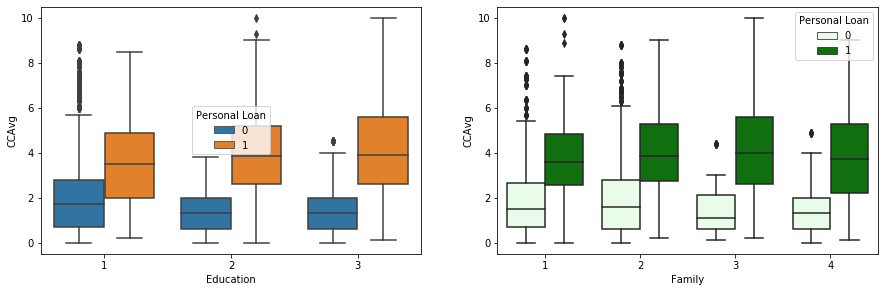

In [71]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x='Education',y='CCAvg',hue='Personal Loan',data=train)

plt.subplot(2,2,2)
sns.boxplot(x='Family',y='CCAvg',hue='Personal Loan',data=train,color='green')

plt.show()

# it is evident that customers across all education level with CCAvg higher than 2K are more likely to accept a personal loan

# CCAvg more than 2 K, are more likely to accept a personal loan

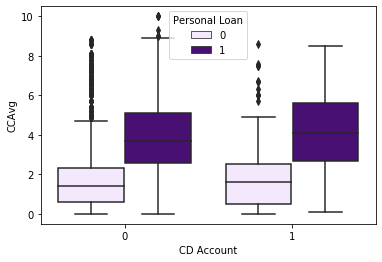

In [73]:
sns.boxplot(hue='Personal Loan',y='CCAvg',x='CD Account',data=train,color='indigo')
# Customers who accepted personal loan tend to have higher CCAvg irrespective of whether they have CD Account or not

In [85]:
train.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [188]:
print('The percentage of customers who did not accept the loan is {0:.2f}%'.format((len(train[train['Personal Loan']==0])/5000)*100))
print('The percentage of customers who accepted the loan is {0:.2f}%'.format((len(train[train['Personal Loan']==1])/5000)*100))

The percentage of customers who did not accept the loan is 90.40%
The percentage of customers who accepted the loan is 9.60%


In [86]:
                                       #Building Classification Models 

In [88]:
# Splitting independent variables and target variable
X = train.drop('Personal Loan',axis=1)
Y = train['Personal Loan']

In [89]:
# It is always a good idea to scale the values
# scale the values using StandardScaler()
scaler = StandardScaler()
X.iloc[:,0:7] = scaler.fit_transform(X.iloc[:,0:7])

In [90]:
# splitting into train and test data into 70:30
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=7,test_size=0.3)

In [169]:
print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of y_train is {y_train.shape}')
print(f'The shape of X_test is {X_test.shape}')
print(f'The shape of y_test is {y_test.shape}')

The shape of X_train is (3500, 11)
The shape of y_train is (3500,)
The shape of X_test is (1500, 11)
The shape of y_test is (1500,)


In [187]:
aa = pd.DataFrame(y_train)
print('The percentage of customers who did not accept the loan is train dataset is {0:.2f}%'.format((len(aa[aa['Personal Loan']==0])/len(aa))*100))
print('The percentage of customers who accepted the loan is test dataset is {0:.2f}%'.format((len(aa[aa['Personal Loan']==1])/len(aa))*100))
bb =pd.DataFrame(y_test)
print(' ')
print('The percentage of customers who did not accept the loan is train dataset is {0:.2f}%'.format((len(bb[bb['Personal Loan']==0])/len(bb))*100))
print('The percentage of customers who accepted the loan is test dataset is {0:.2f}%'.format((len(bb[bb['Personal Loan']==1])/len(bb))*100))


The percentage of customers who did not accept the loan is train dataset is 90.23%
The percentage of customers who accepted the loan is test dataset is 9.77%
 
The percentage of customers who did not accept the loan is train dataset is 90.80%
The percentage of customers who accepted the loan is test dataset is 9.20%


In [91]:
                                             #Logistic Regression 

In [92]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(' ')
print('The accuracy score for Logistic Regression on train data is {0:.2f}%'.format(lr.score(X_train,y_train)*100))
print(' ')
print('The accuracy score for Logistic Regression on test data is {0:.2f}%'.format(lr.score(X_test,y_test)*100))

 
The accuracy score for Logistic Regression on train data is 95.20%
 
The accuracy score for Logistic Regression on test data is 95.47%


 
                Confusion Matrix 


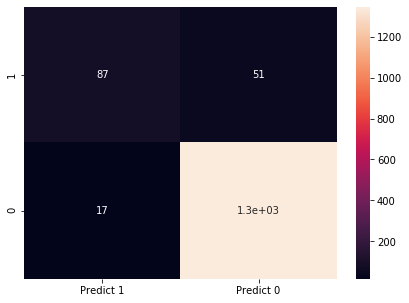

In [93]:
print(' ')
print('                Confusion Matrix ') 
cm=metrics.confusion_matrix(y_test,y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
df_cm
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

In [94]:
print("           Classification Report for Logistic Regression")
print('')
print(metrics.classification_report(y_test,y_pred, labels=[1, 0]))

# Precision score is high for both 1 & 0
# though the recall score is high for predicting 0, 
# the recall value is not so high for 1. i.e. only 63% of the times 1 is predicted as 1 

# In real life scenerio, since the recall value is less there is potential chance that a customer who might take a personal loan
# will be falsely predicted as 'he will not take the loan' , which is not good from a banks point of view

           Classification Report for Logistic Regression

              precision    recall  f1-score   support

           1       0.84      0.63      0.72       138
           0       0.96      0.99      0.98      1362

    accuracy                           0.95      1500
   macro avg       0.90      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [95]:
                                      #Naive Bayes Classification

In [97]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
print(' ')
print('The accuracy score for Gaussian Naive Bayes on train data is {0:.2f}%'.format(nb.score(X_train,y_train)*100))
print(' ')
print('The accuracy score for Gaussian Naive Bayes on test data is {0:.2f}%'.format(nb.score(X_test,y_test)*100))

 
The accuracy score for Gaussian Naive Bayes on train data is 88.17%
 
The accuracy score for Gaussian Naive Bayes on test data is 87.93%


 
                Confusion Matrix 


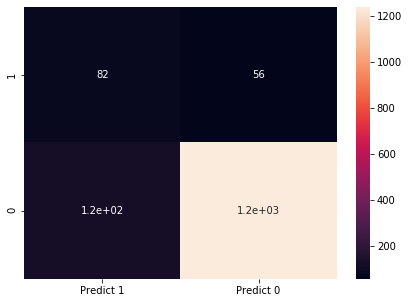

In [98]:
print(' ')
print('                Confusion Matrix ') 
cm=metrics.confusion_matrix(y_test,nb_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
df_cm
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

In [99]:
print("               Classification Report for Naive Bayes")
print('')
print(metrics.classification_report(y_test,nb_pred, labels=[1, 0]))

# both precision and recall are low when compared with Logistic Regression

               Classification Report for Naive Bayes

              precision    recall  f1-score   support

           1       0.40      0.59      0.48       138
           0       0.96      0.91      0.93      1362

    accuracy                           0.88      1500
   macro avg       0.68      0.75      0.70      1500
weighted avg       0.91      0.88      0.89      1500



In [101]:
                                           #K-Nearest Neighbors 

In [112]:

myList = list(range(1,40))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
ac_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

MSE = [x for x in ac_scores]

optimal_k = neighbors[MSE.index(max(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


In [113]:
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print(' ')
print('The accuracy score for K-Nearest Neighbors on train data is {0:.2f}%'.format(knn.score(X_train,y_train)*100))
print(' ')
print('The accuracy score for K-Nearest Neighbors on test data is {0:.2f}%'.format(knn.score(X_test,y_test)*100))

 
The accuracy score for K-Nearest Neighbors on train data is 97.77%
 
The accuracy score for K-Nearest Neighbors on test data is 97.00%


 
                Confusion Matrix 


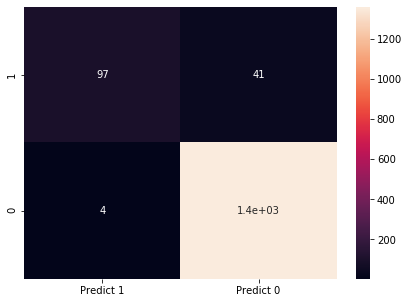

In [114]:
print(' ')
print('                Confusion Matrix ') 
cm=metrics.confusion_matrix(y_test,knn_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
df_cm
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

In [115]:
print("             Classification Report for KNN Classifier K=3")
print('')
print(metrics.classification_report(y_test,knn_pred, labels=[1, 0]))

# KNN classifier has good precision rate 
# the recall is also comparitively higher than all the other models. 
# hence KNN is the best model to predict this data set

             Classification Report for KNN Classifier K=3

              precision    recall  f1-score   support

           1       0.96      0.70      0.81       138
           0       0.97      1.00      0.98      1362

    accuracy                           0.97      1500
   macro avg       0.97      0.85      0.90      1500
weighted avg       0.97      0.97      0.97      1500



In [190]:
# Performing KNN for k=1
knn = KNeighborsClassifier(n_neighbors=1,metric='euclidean')
knn.fit(X_train,y_train)
knn1_pred = knn.predict(X_test)
print(' ')
print('The accuracy score for K-Nearest Neighbors on train data is {0:.2f}%'.format(knn.score(X_train,y_train)*100))
print(' ')
print('The accuracy score for K-Nearest Neighbors on test data is {0:.2f}%'.format(knn.score(X_test,y_test)*100))

 
The accuracy score for K-Nearest Neighbors on train data is 100.00%
 
The accuracy score for K-Nearest Neighbors on test data is 97.07%


 
                Confusion Matrix 


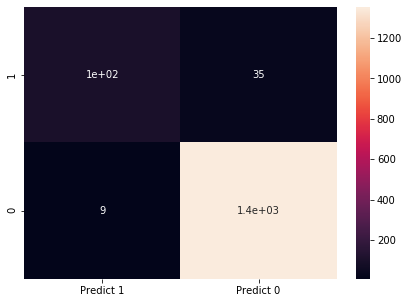

In [117]:
print(' ')
print('                Confusion Matrix ') 
cm=metrics.confusion_matrix(y_test,knn1_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1","Predict 0"]])
df_cm
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()

In [118]:
print("             Classification Report for KNN Classifier K=1")
print('')
print(metrics.classification_report(y_test,knn1_pred, labels=[1, 0]))

# KNN classifier with k=1 seems to be the best for predicting this data set. Although this may seem like an over fit model, 
# this has the best recall rate and f1-score over all the other models.
# In real life scenerio, this model has the least chance in missing out a potential customer

             Classification Report for KNN Classifier K=1

              precision    recall  f1-score   support

           1       0.92      0.75      0.82       138
           0       0.97      0.99      0.98      1362

    accuracy                           0.97      1500
   macro avg       0.95      0.87      0.90      1500
weighted avg       0.97      0.97      0.97      1500



In [191]:
# Logistic Regression model - Although the Precision score is high for both 1 & 0 and the recall score is high for predicting 0, 
# the recall value is not so high for 1. i.e. only 63% of the times the liability of a customer buying a loan is predicted correct 

# In real life scenerio, 63% is not so acceptable since a lot of potential customers are missed out


# Naive Bayes - The accuracy score for both train and test data is around 88% 
# however, both precision and recall are very low when compared with Logistic Regression. 

# KNN - for k = 3, precision rate is very good & the recall is also comparitively higher than all the other models. 
#  for k=1, the highest recall and f1 score of all the models is obtained. Accuracy score and precision obtained is also high.

# From a banks perspective, the loss of labelling a 'buyer as non-buyer' is a lot higher than labelling a 'non-buyer as a buyer'
# Hence KNN - Classifier with k=1 is the best model to predict.